In [26]:
base_dir = '/home/shrey/Desktop/keras_ml/datasets/eye_gestures_grey/'
train_dir = base_dir + 'train/'
validation_dir = base_dir + 'valid/'
test_dir = base_dir + 'test/'

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

In [28]:
from keras import backend as K
import tensorflow

In [29]:
import numpy as np
import os
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt

In [30]:
model = Sequential()
model.add(Conv2D(4,(3, 3), activation='relu',input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(8,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 4)         40        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 4)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 8)         296       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

In [31]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
train_dir,
color_mode='grayscale',
target_size=(100,100),
batch_size=128,
class_mode='binary')

Found 3076 images belonging to 2 classes.


In [33]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
color_mode='grayscale',
target_size=(100,100),
batch_size=128,
class_mode='binary')

Found 767 images belonging to 2 classes.


In [34]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-3),metrics=['accuracy'])

In [35]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/20
100/100 [==============================] - 70s 696ms/step - loss: 0.6031 - accuracy: 0.6290 - val_loss: 0.4353 - val_accuracy: 0.6264
Epoch 2/20
100/100 [==============================] - 65s 654ms/step - loss: 0.3938 - accuracy: 0.8387 - val_loss: 0.1438 - val_accuracy: 1.0000
Epoch 3/20
100/100 [==============================] - 66s 665ms/step - loss: 0.2242 - accuracy: 0.9316 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 4/20
100/100 [==============================] - 66s 657ms/step - loss: 0.1573 - accuracy: 0.9532 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 5/20
100/100 [==============================] - 66s 656ms/step - loss: 0.1218 - accuracy: 0.9600 - val_loss: 0.0292 - val_accuracy: 0.9977
Epoch 6/20
100/100 [==============================] - 66s 662ms/step - loss: 0.1112 - accuracy: 0.9690 - val_loss: 0.0208 - val_accuracy: 0.9987
Epoch 7/20
100/100 [==============================] - 69s 693ms/step - loss: 0.0961 - accuracy: 0.9703 - val_loss: 0.0151 - val_ac

In [36]:
model.save('eye_gestures_grey4.h5')

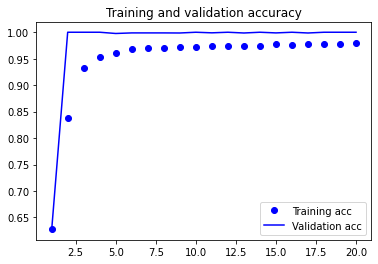

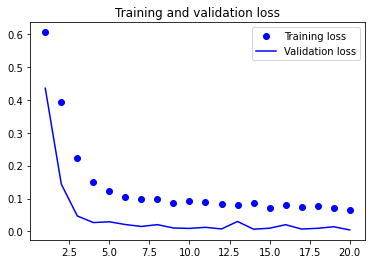

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [38]:
from keras.preprocessing import image
import cv2
img_path = '/home/shrey/Desktop/keras_ml/datasets/eye_gestures_grey/train/closed/image0.jpg'
img = cv2.imread(img_path,0)
img = cv2.resize(img,(100,100),cv2.INTER_AREA)
#img = resized[:,:,0]
img = np.expand_dims(img,axis=-1)
img = np.expand_dims(img,axis=0)
img = img/255
model.predict(img)

array([[0.01265619]], dtype=float32)